<a href="https://colab.research.google.com/github/TraoAnTan/AI/blob/main/BaitapFuzzy_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5ad17f43e5304b894cf2caa1803e399ef45cd3f2ade72d007f5f37f12074397a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
# 2.3.1 ProtFIS

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

sirolimus = ctrl.Antecedent(np.arange(0,20.5,0.5), 'sirolimus')
glycaemia = ctrl.Antecedent(np.arange(70,151,1),'glycaemia')
proteinuria = ctrl.Consequent(np.arange(0,5100,100),'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [70,85,100])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [100,112,125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125,140,150])

sirolimus['alram down'] = fuzz.trimf(sirolimus.universe, [0,1,2])
sirolimus['good'] = fuzz.trimf(sirolimus.universe, [1.5,3.5,5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe, [4,7.5,11])
sirolimus['alarm up'] = fuzz.trimf(sirolimus.universe, [8,11,15])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe, [12,16,20])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150,150,150])
proteinuria['sufficient']= fuzz.trimf(proteinuria.universe, [150,330,500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500,750,1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000,2000,3000])
proteinuria['danger'] =fuzz.trimf(proteinuria.universe, [3000,4000,5000])

# glycaemia.view()
# sirolimus.view()
# proteinuria.view()

rule1 = ctrl.Rule(glycaemia['good']& sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']& sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']& sirolimus['good'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm']& sirolimus['alarm up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']& sirolimus['good'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']& sirolimus['alarm up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']& sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good']& sirolimus['alram down'], proteinuria['sufficient'])
rule9 = ctrl.Rule(glycaemia['danger']& sirolimus['good'], proteinuria['alarm'])
rule10 = ctrl.Rule(glycaemia['danger']& sirolimus['good'], proteinuria['alarm'])
rule11 = ctrl.Rule(glycaemia['danger']& sirolimus['alarm up'], proteinuria['danger'])

proteinuria_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11])
proteinuria_result = ctrl.ControlSystemSimulation(proteinuria_ctrl)
proteinuria_result.input['sirolimus'] = 10
proteinuria_result.input['glycaemia']= 113
proteinuria_result.compute()
print(proteinuria_result.output['proteinuria'])
proteinuria.view(sim = proteinuria_result)




In [ ]:
# 2.3.2 GfrFIS
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

glycaemia = ctrl.Antecedent(np.arange(70, 151, 1), 'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0, 22.5, 0.5), 'cyclosporine')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [70, 85, 100])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [100, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125, 138, 150])

cyclosporine['alarm_down'] = fuzz.trimf(cyclosporine.universe, [0,1,2])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe, [1.5,3.5,5])
cyclosporine['sufficient'] = fuzz.trimf(cyclosporine.universe, [4,7.5,11])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe, [8,11.5,15])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe, [12,16,20])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'], GFR['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm_up'], GFR['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['sufficient'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'], GFR['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'], GFR['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'], GFR['alarm3'])
rule8 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['danger'], GFR['alarm4'])

# glycaemia.view()
# cyclosporine.view()
# GFR.view()

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)
gfr.input['glycaemia'] = 83
gfr.input['cyclosporine'] = 4
gfr.compute()
print(gfr.output['GFR']) 
GFR.view(sim=gfr)




In [ ]:
# 2.4.1 ProtACE
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(70, 151, 1), 'glycaemia')
ACE_inhibitor = ctrl.Antecedent(np.arange(0, 11.5, 0.5), 'ACE_inhibitor')
proteinuria = ctrl.Consequent(np.arange(150, 5001, 1), 'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [70, 85, 100])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [100, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125, 138, 150])

ACE_inhibitor['0'] = fuzz.trimf(ACE_inhibitor.universe, [0, 0, 0.5])
ACE_inhibitor['1'] = fuzz.trimf(ACE_inhibitor.universe, [0.5, 1, 1.5])
ACE_inhibitor['2'] = fuzz.trimf(ACE_inhibitor.universe, [1.5, 2, 2.5])
ACE_inhibitor['3'] = fuzz.trimf(ACE_inhibitor.universe, [2.5, 3.5, 5])
ACE_inhibitor['4'] = fuzz.trimf(ACE_inhibitor.universe, [5, 7.5, 10])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150, 150, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [151, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 4000, 5000])



rule1 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['2'], proteinuria['sufficient'])
rule2 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['1'], proteinuria['sufficient'])
rule3 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['1'], proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['1'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['3'], proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['3'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['4'], proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['0'], proteinuria['good'])
rule9 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['4'], proteinuria['danger'])

# glycaemia.view()
# ACE_inhibitor.view()
# proteinuria.view()

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
protein = ctrl.ControlSystemSimulation( proteinuria_ctrl)
protein.input['glycaemia'] = 101
protein.input['ACE_inhibitor'] = 4
protein.compute()
print(protein.output['proteinuria'])
proteinuria.view(sim=protein)

45.0


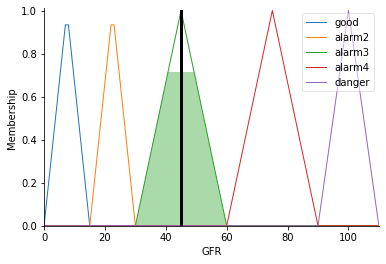

In [44]:
# 2.4.2 GfrACE
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(70, 151, 1), 'glycaemia')
ACE_inhibitor = ctrl.Antecedent(np.arange(0, 11, 1), 'ACE_inhibitor')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 151])

ACE_inhibitor['0'] = fuzz.trimf(ACE_inhibitor.universe, [0, 0, 0.5])
ACE_inhibitor['1'] = fuzz.trimf(ACE_inhibitor.universe, [0.4, 0.85, 1.25])
ACE_inhibitor['2'] = fuzz.trimf(ACE_inhibitor.universe, [1.2, 1.8, 2.5])
ACE_inhibitor['3'] = fuzz.trimf(ACE_inhibitor.universe, [2.4, 3.6, 5])
ACE_inhibitor['4'] = fuzz.trimf(ACE_inhibitor.universe, [4.9, 7.5, 10])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])


rule1 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['2'], GFR['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['2'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['1'], GFR['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['1'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['3'], GFR['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['3'], GFR['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['4'], GFR['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['0'], GFR['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['4'], GFR['danger'])

# glycaemia.view()
# cyclosporine.view()
# GFR.view()

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)
gfr.input['glycaemia'] = 83
gfr.input['ACE_inhibitor'] = 4
gfr.compute()
print(gfr.output['GFR'])
GFR.view(sim=gfr)